### CPSC 585 project5

    Sicheng Long          xlongx@cus.fullerton.edu      887447837
    Malyaj Sirothia       malyaj93@csu.fullerton.edu    886687508

In [2]:
'''
mount google drive
'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


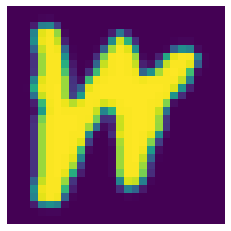

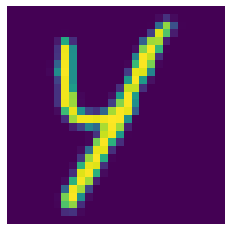

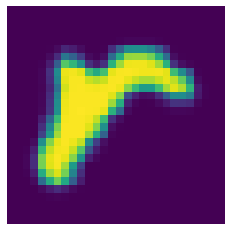

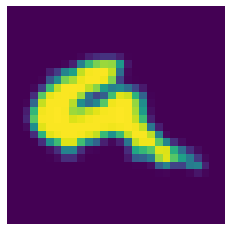

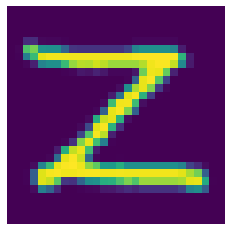

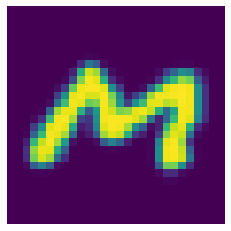

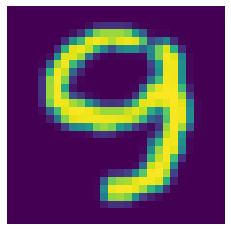

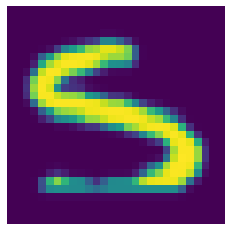

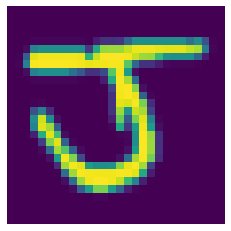

Shape of train set: (104000, 784)
Shape of train label: (104000, 27)
Shape of test set: (20800, 784)
Shape of test label: (20800, 27)
Shape of validate set: (20800, 784)
Shape of validate label: (20800, 27)


In [3]:
'''
Step 1
Load emnist_letters.npz, and output some of the images
'''

import numpy as np
import matplotlib.pyplot as plt

data = np.load('/content/drive/MyDrive/Colab/emnist_letters.npz') # load the file emnist_letters.npz from google driver
# 6 sets of the data
test_images = data['test_images']
test_labels = data['test_labels']
train_images = data['train_images']
train_labels = data['train_labels']
validate_images = data['validate_images']
validate_labels = data['validate_labels']

# output 9 images
train1 = np.reshape(train_images[0], (28, 28))
test1 = np.reshape(test_images[0], (28, 28))
validate1 = np.reshape(validate_images[0], (28, 28))
train2 = np.reshape(train_images[103999], (28, 28))
test2 = np.reshape(test_images[20799], (28, 28))
validate2 = np.reshape(validate_images[20799], (28, 28))
train3 = np.reshape(train_images[10000], (28, 28))
test3 = np.reshape(test_images[10000], (28, 28))
validate3 = np.reshape(validate_images[10000], (28, 28))
L = [train1, train2, train3, test1, test2, test3, validate1, validate2, validate3]
for item in L:
  plt.imshow(item) 
  plt.axis('off') 
  plt.show()

# show the shape of every set    
print("Shape of train set:", train_images.shape)
print("Shape of train label:", train_labels.shape)
print("Shape of test set:", test_images.shape)
print("Shape of test label:", test_labels.shape)
print("Shape of validate set:", validate_images.shape)
print("Shape of validate label:", validate_labels.shape)

In [5]:
'''
Step 2
Applying Chollet’s MNIST notebook to the EMNIST Letters data

After applying the same architecture as MNIST to the EMINST letter data we are getting comparetively lesser accuracy.
'''

from keras import models
from keras import layers

train_images = train_images.reshape((104000, 28 * 28))
test_images = test_images.reshape((20800, 28 * 28))
validate_images = validate_images.reshape((20800, 28 * 28))

network1 = models.Sequential()
network1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network1.add(layers.Dense(27, activation='softmax'))


network1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network1.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), epochs=5, batch_size=128)

test_loss, test_acc = network1.evaluate(test_images, test_labels)
validate_loss, validate_acc = network1.evaluate(validate_images, validate_labels)
print('test_acc----->>', test_acc)
print('Validate_acc---------->>', validate_acc)


Epoch 1/5
813/813 [==============================] - 4s 5ms/step - loss: 1.0786 - accuracy: 0.6892 - val_loss: 0.5188 - val_accuracy: 0.8425
Epoch 2/5
813/813 [==============================] - 4s 4ms/step - loss: 0.3989 - accuracy: 0.8762 - val_loss: 0.4010 - val_accuracy: 0.8763
Epoch 3/5
813/813 [==============================] - 4s 5ms/step - loss: 0.3017 - accuracy: 0.9038 - val_loss: 0.3423 - val_accuracy: 0.8961
Epoch 4/5
813/813 [==============================] - 4s 4ms/step - loss: 0.2576 - accuracy: 0.9169 - val_loss: 0.3343 - val_accuracy: 0.8995
Epoch 5/5
650/650 [==============================] - 2s 3ms/step - loss: 0.3347 - accuracy: 0.8998
test_acc----->> 0.8988942503929138
Validate_acc---------->> 0.8997595906257629


In [9]:
'''
Step 3
Keep the same number of layers in the network
Modify the architecture to improve the accuracy
Name this new model as "network2"
'''

network2 = models.Sequential()
network2.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))  # add more nodes in this hidden layer
network2.add(layers.Dense(27, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# add validation set in the training process
network2 .fit(train_images, train_labels, validation_data=(validate_images,validate_labels), epochs=50, batch_size=128)

Epoch 1/50
813/813 [==============================] - 5s 6ms/step - loss: 0.9352 - accuracy: 0.7241 - val_loss: 0.4090 - val_accuracy: 0.8748
Epoch 2/50
813/813 [==============================] - 5s 6ms/step - loss: 0.3224 - accuracy: 0.8961 - val_loss: 0.3825 - val_accuracy: 0.8799
Epoch 3/50
813/813 [==============================] - 5s 6ms/step - loss: 0.2477 - accuracy: 0.9191 - val_loss: 0.3201 - val_accuracy: 0.9034
Epoch 4/50
813/813 [==============================] - 5s 6ms/step - loss: 0.2017 - accuracy: 0.9310 - val_loss: 0.3164 - val_accuracy: 0.9086
Epoch 5/50
813/813 [==============================] - 5s 6ms/step - loss: 0.1734 - accuracy: 0.9401 - val_loss: 0.3528 - val_accuracy: 0.8992
Epoch 6/50
813/813 [==============================] - 5s 6ms/step - loss: 0.1560 - accuracy: 0.9461 - val_loss: 0.3714 - val_accuracy: 0.8984
Epoch 7/50
813/813 [==============================] - 5s 6ms/step - loss: 0.1429 - accuracy: 0.9491 - val_loss: 0.3693 - val_accuracy: 0.9083
Epoch 

We test for several values of nodes number in the hidden layer, like 512, 768, 1024, and 2048. We found 2048 might have the best accuracy on validation set.  
In step 3, we set the number of epoch to 50. From the result, we can find that the loss of validation set have the lowest loss value at about epoch 20 to 30, so we can use early stop to upgrade our accuracy. The overall accuray of the validation set is much better than question 2.

In [10]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)

650/650 [==============================] - 2s 3ms/step - loss: 1.1067 - accuracy: 0.9067


The accuracy of test set applying for network2, 90.38%

In [11]:
'''
Step 4
Based on step 3, we make another model "network3".
Trying to get a higher accuracy on validation set of network3
'''

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
#from keras.layers import Dropout

network3 = models.Sequential()
network3.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))  # deleted: , kernel_regularizer=regularizers.l1(l1=1e-5)
#network3.add(Dropout(0.2))
network3.add(layers.Dense(27, activation='softmax'))

best_weights_path = '/content/drive/MyDrive/Colab/best_weights.hdf5'  # the path of storing the best weights
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto') # early stoping, monitoring accuracy on validation set
save_best_model = ModelCheckpoint(best_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto') # save the best model with best weights

network3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), callbacks=[early_stopping, save_best_model], epochs=50, batch_size=128)
network3.load_weights(best_weights_path)

Epoch 1/50
813/813 [==============================] - 6s 7ms/step - loss: 1.2025 - accuracy: 0.7249 - val_loss: 0.6634 - val_accuracy: 0.8603

Epoch 00001: val_accuracy improved from -inf to 0.86029, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 2/50
813/813 [==============================] - 5s 6ms/step - loss: 0.5758 - accuracy: 0.8854 - val_loss: 0.5516 - val_accuracy: 0.8887

Epoch 00002: val_accuracy improved from 0.86029 to 0.88870, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 3/50
813/813 [==============================] - 5s 6ms/step - loss: 0.4903 - accuracy: 0.9007 - val_loss: 0.5172 - val_accuracy: 0.8956

Epoch 00003: val_accuracy improved from 0.88870 to 0.89558, saving model to /content/drive/MyDrive/Colab/best_weights.hdf5
Epoch 4/50
813/813 [==============================] - 5s 6ms/step - loss: 0.4412 - accuracy: 0.9110 - val_loss: 0.5360 - val_accuracy: 0.8860

Epoch 00004: val_accuracy did not improve from 0.89558
Epoch 5

We use early stop and regulariztion to get a better accuracy. At epoch 15, the model got the best accuracy at 91.077%.  
We also test for several activation functions in the hidden layer, leaky RELU, PRELU, and tanh. The best accuracy on validation set is RELU.  
We also tried Dropout, but could not get a better accuracy.

In [12]:
test_loss, test_acc = network3.evaluate(test_images, test_labels)

650/650 [==============================] - 2s 3ms/step - loss: 0.4423 - accuracy: 0.9094


There is an improvment about the accuracy on test set, improved about more than 0.3%.

In [16]:
'''
Step 5
Add additional Dense hidden layers as appropriate to improve the accuracy.
Based on step 4, we make another model "network4".
'''

network4 = models.Sequential()
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(l1=1e-5)))
network4.add(layers.Dense(27, activation='softmax'))

best_weights_path = '/content/drive/MyDrive/Colab/best_weights_2.hdf5'  # the path of storing the best weights
early_stopping_2 = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto') # early stoping, monitoring accuracy on validation set
save_best_model_2 = ModelCheckpoint(best_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto') # save the best model with best weights

network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.fit(train_images, train_labels, validation_data=(validate_images,validate_labels), callbacks=[early_stopping_2, save_best_model_2], epochs=50, batch_size=128)
network4.load_weights(best_weights_path)

Epoch 1/50
813/813 [==============================] - 6s 7ms/step - loss: 1.2797 - accuracy: 0.7027 - val_loss: 0.6463 - val_accuracy: 0.8798

Epoch 00001: val_accuracy improved from -inf to 0.87976, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 2/50
813/813 [==============================] - 5s 7ms/step - loss: 0.5910 - accuracy: 0.8910 - val_loss: 0.5957 - val_accuracy: 0.8851

Epoch 00002: val_accuracy improved from 0.87976 to 0.88510, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 3/50
813/813 [==============================] - 5s 7ms/step - loss: 0.4959 - accuracy: 0.9092 - val_loss: 0.5295 - val_accuracy: 0.9014

Epoch 00003: val_accuracy improved from 0.88510 to 0.90144, saving model to /content/drive/MyDrive/Colab/best_weights_2.hdf5
Epoch 4/50
813/813 [==============================] - 5s 7ms/step - loss: 0.4360 - accuracy: 0.9188 - val_loss: 0.5398 - val_accuracy: 0.8899

Epoch 00004: val_accuracy did not improve from 0.90144
E

We now set 3 hidden layers with each layer has 512 nodes. At epoch 10, the model got the best accuracy at 91.750%. The accuracy improved a little compared with step 4.

In [17]:
test_loss, test_acc = network4.evaluate(test_images, test_labels)

650/650 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.9146


Compared with step4, the accuracy on test set is also improved.

#### Step 6

From the output of the four networks on test set, we can find that step 2 to step 5, each model have an improvement base on the model before. At last the acuracy improve almost 1.3%, from 89.98% to 90.67% to 90.94% to 91.46%.

Wrong predicted image 0
Predicted as 17
Right lable is 1


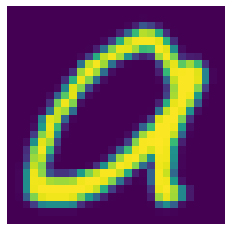

Wrong predicted image 1
Predicted as 21
Right lable is 1


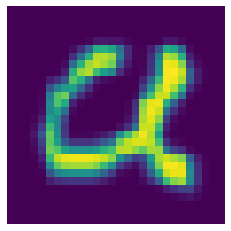

Wrong predicted image 2
Predicted as 7
Right lable is 1


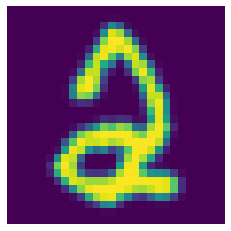

Wrong predicted image 3
Predicted as 17
Right lable is 1


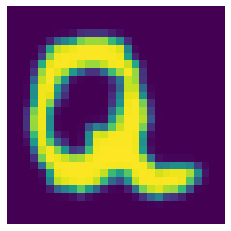

Wrong predicted image 4
Predicted as 17
Right lable is 1


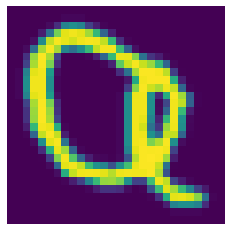

Wrong predicted image 5
Predicted as 15
Right lable is 1


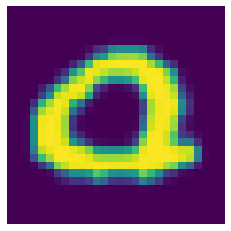

Wrong predicted image 6
Predicted as 26
Right lable is 1


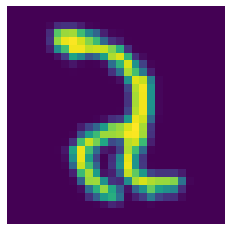

Wrong predicted image 7
Predicted as 15
Right lable is 1


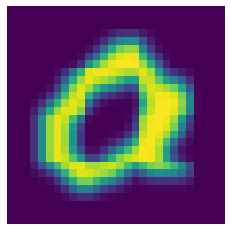

Wrong predicted image 8
Predicted as 26
Right lable is 1


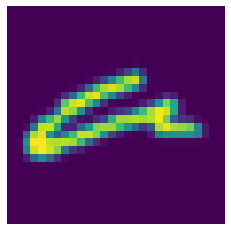

Wrong predicted image 9
Predicted as 15
Right lable is 1


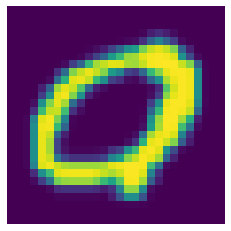

Wrong predicted image 10
Predicted as 15
Right lable is 1


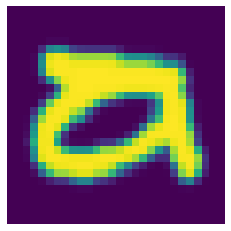

Wrong predicted image 11
Predicted as 4
Right lable is 1


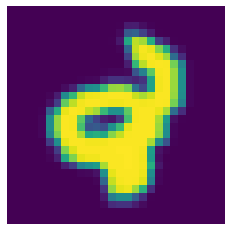

Wrong predicted image 12
Predicted as 16
Right lable is 1


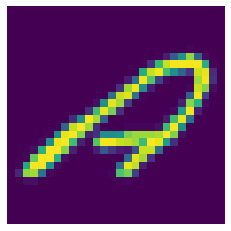

Wrong predicted image 13
Predicted as 16
Right lable is 1


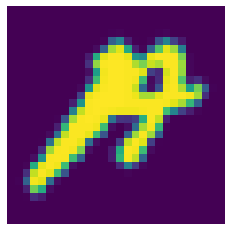

Wrong predicted image 14
Predicted as 5
Right lable is 1


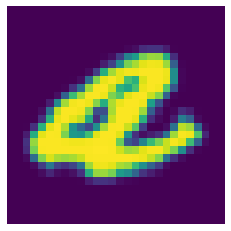

Wrong predicted image 15
Predicted as 4
Right lable is 1


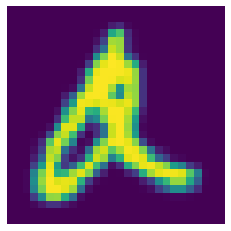

Wrong predicted image 16
Predicted as 13
Right lable is 1


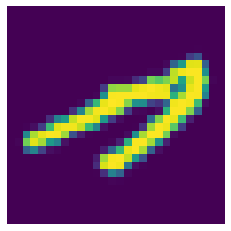

Wrong predicted image 17
Predicted as 6
Right lable is 1


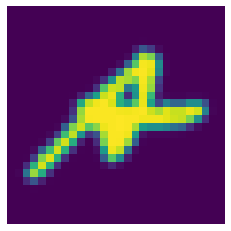

Wrong predicted image 18
Predicted as 3
Right lable is 1


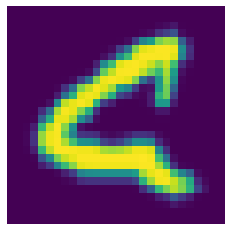

Wrong predicted image 19
Predicted as 15
Right lable is 1


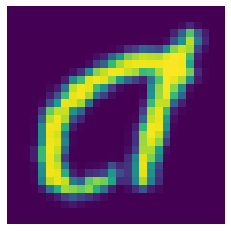

Wrong predicted image 20
Predicted as 15
Right lable is 1


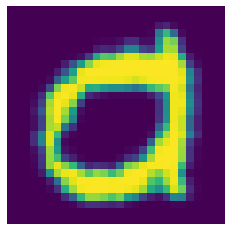

Wrong predicted image 21
Predicted as 26
Right lable is 1


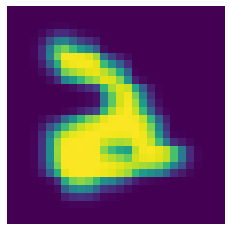

Wrong predicted image 22
Predicted as 17
Right lable is 1


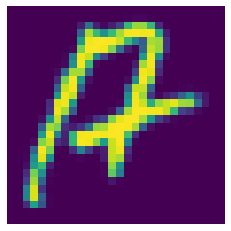

Wrong predicted image 23
Predicted as 17
Right lable is 1


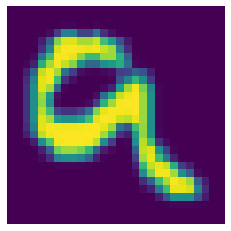

Wrong predicted image 24
Predicted as 14
Right lable is 1


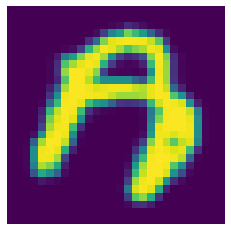

Wrong predicted image 25
Predicted as 4
Right lable is 1


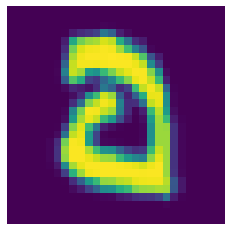

Wrong predicted image 26
Predicted as 14
Right lable is 1


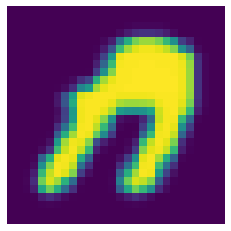

Wrong predicted image 27
Predicted as 5
Right lable is 1


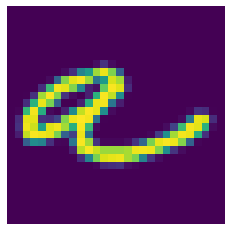

Wrong predicted image 28
Predicted as 18
Right lable is 1


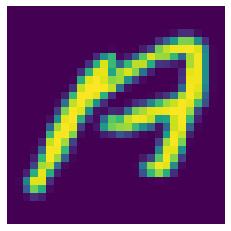

Wrong predicted image 29
Predicted as 17
Right lable is 1


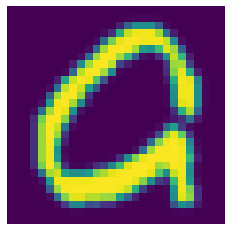

In [21]:
'''
Step 7
Output 30 wrong predict images, and discuss why
'''

pred = network4.predict(test_images)
i = 0
for j in range(len(pred)):
  if np.argmax(pred[j]) != np.argmax(test_labels[j]) and i < 30:
    print("Wrong predicted image", i)
    print("Predicted as", np.argmax(pred[j]))
    print("Right lable is", np.argmax(test_labels[j]))
    i += 1
    test_image = np.reshape(test_images[j], (28, 28))
    plt.imshow(test_image) 
    plt.axis('off') 
    plt.show()

In step 7, we outputs the first 20 wrong predicted images. Because of test set is 20800 elements, so the wrong images are all "A" or "a". From the result we can find the probability of wrong prediction is more accurred on "a" than "A". Some images "a" predict as "D", "E", "O" or "Q", that might because the hand writing "a" is similar to "D", "e", "O", "o", and "Q".